In [88]:
import numpy as np 
import matplotlib.pyplot as plt
import math

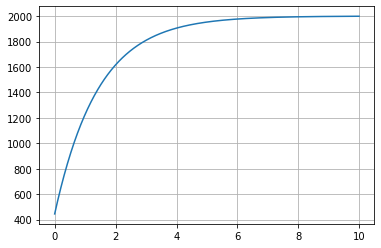

In [89]:
Lo=2000
def L(Lo,Kconst,LAI,m):
    return Lo*(1-(Kconst*np.exp(-Kconst*LAI))/(1-m))
ArrLAI=[i for i in np.arange(0,10,0.01)]
PAR_absorbed_by_canopy=[L(Lo,0.7,i,0.1) for i in ArrLAI]
plt.plot(ArrLAI,PAR_absorbed_by_canopy)
plt.grid()
plt.show()


In [90]:
K_To=8.4
To=298.15
Ha=37000
R=8.314472
Hd=220000
S=710
Kconst=1 #0.7
m=0.1
#### cần xem lại
RES=250 #250 #200 #250  to 312.5
KL= 500 #406.5 #555.56 #gia tri= 1/4 gia tri Lo
Lo=2000  #680#2222.222#1740 #2222.222 =210/0.385 
Km= 10000 #10000#404.9#10  
P_MLT=50 #50#50#1 #1 #0.035

Temp=np.arange(270,330,1)
def K(T):
    return K_To*math.exp(-Ha/R*(1/T-1/To))

def f(T):
    tuso=1+math.exp(-Hd/R*(1/To-1/(Hd/S)))
    mauso=1+math.exp(-Hd/R*(1/T-1/(Hd/S)))
    return tuso/mauso
def L(Lo,Kconst,LAI,m):
    return Lo*(1-(Kconst*np.exp(-Kconst*LAI))/(1-m))

def K_new(LAI,Tem):
    return LAI*float(K(Tem))
def PMax(Tem):
    return float(K(Tem))*float(f(Tem))
def PMax_New(LAI,Tem):
    return LAI*PMax(Tem) #/PMax(304)
#print(L(Lo,K,LAI,m))
def PMaxForMultipleLeaves(LAI,T):
    tuso=float(P_MLT)
    tuso*=float(PMax_New(LAI,T))/PMax_New(3,304)
    tuso*=L(Lo,Kconst,LAI,m)
    mauso=L(Lo,Kconst,LAI,m)
    mauso+=KL
    tuso/=mauso
    return tuso
print("KT at 293=",K_new(3,293))
Arr_Pmax=[PMax_New(3,x) for x in Temp]
print("-----")
print(PMax_New(3,304))
print(PMaxForMultipleLeaves(3,293))

KT at 293= 19.38499991751361
-----
29.138980178262003
27.02329010574452


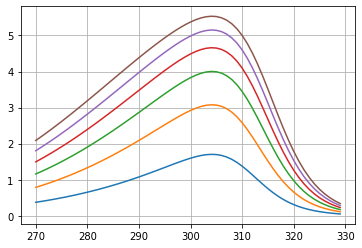

In [91]:
def P_New(LAI,CO2_air,T):
    component1=CO2_air+Km+RES*PMaxForMultipleLeaves(LAI,T)
    component2=((CO2_air+Km+RES*PMaxForMultipleLeaves(LAI,T))**2-4*CO2_air*RES*PMaxForMultipleLeaves(LAI,T))**(1/2)
    kq=(component1-component2)/(2*RES)
    return kq
for i in range(1,7):
    if True:
        Photosynthesis_rate_with_any_CO2Air=[P_New(i,2127,x) for x in Temp]
        plt.plot(Temp,Photosynthesis_rate_with_any_CO2Air)
plt.grid()
plt.show()


In [92]:
print(PMaxForMultipleLeaves(3,292))

25.703508488338016
